In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load the dataset

In [90]:
data=pd.read_csv(r'C:\Users\user\Downloads\train.csv')

In [91]:
data.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [63]:
#checking datatypes ana shape
data.shape

(13994, 30)

In [64]:
data.dtypes

player_id                     object
name                          object
age                            int64
gender                        object
country                       object
height                        object
weight                        object
ball_controlling_skills      float64
body_reflexes                float64
body_balance                 float64
jumping_skills               float64
penalties_conversion_rate    float64
mental_strength              float64
goalkeeping_skills           float64
defending_skills             float64
passing_skills               float64
dribbling_skills             float64
shot_accuracy                float64
body_strength_stamina        float64
max_running_speed            float64
strong_foot                   object
behaviour_rating             float64
matches_played               float64
fitness_rating               float64
trophies_won                 float64
dedication_level              object
coaching                      object
y

In [10]:
#Checking for missing values
data.isna().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

In [65]:
data.columns

Index(['player_id', 'name', 'age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection'],
      dtype='object')

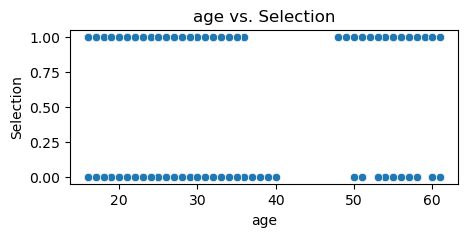

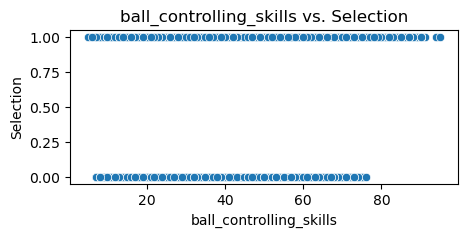

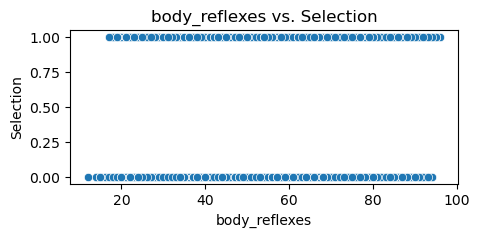

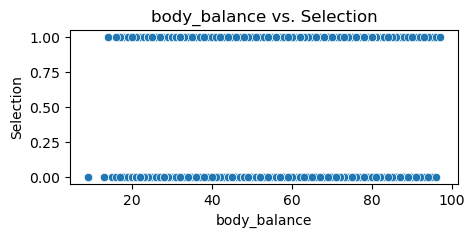

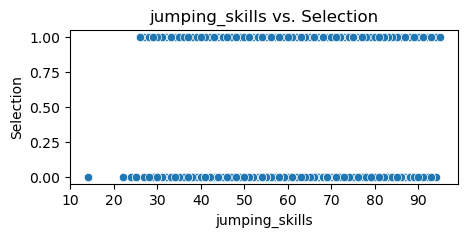

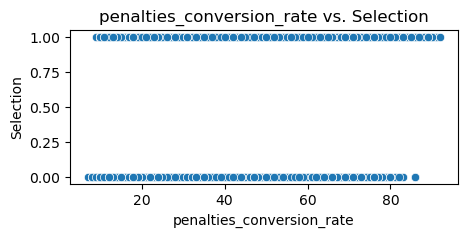

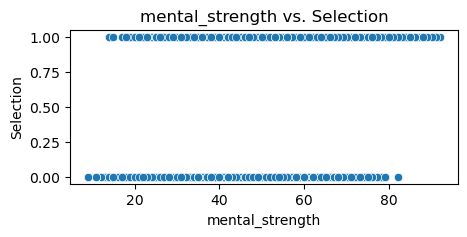

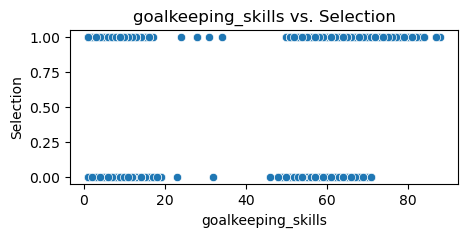

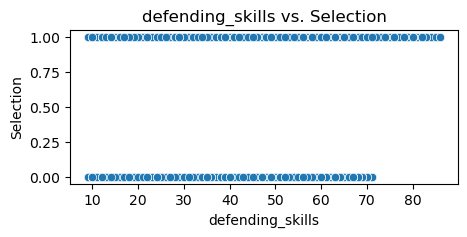

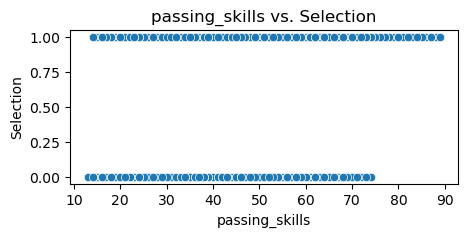

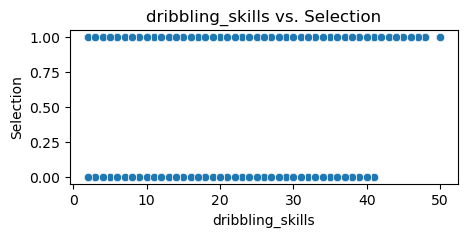

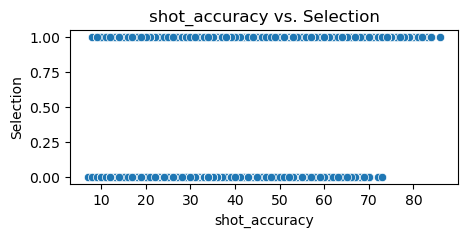

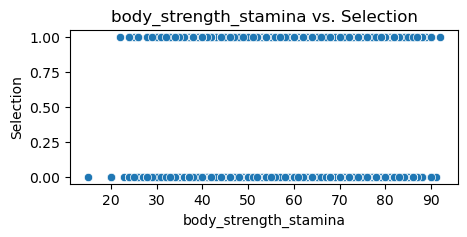

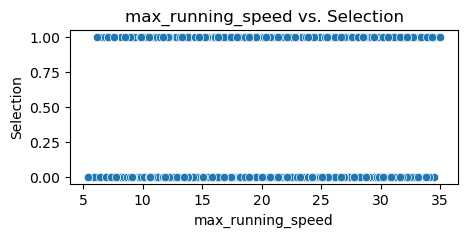

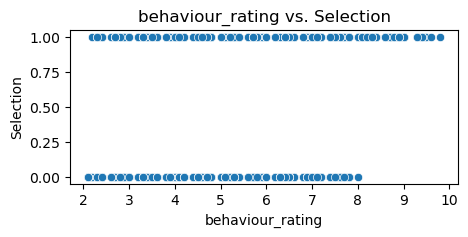

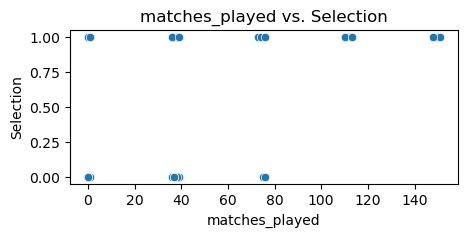

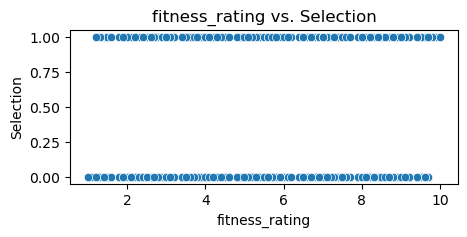

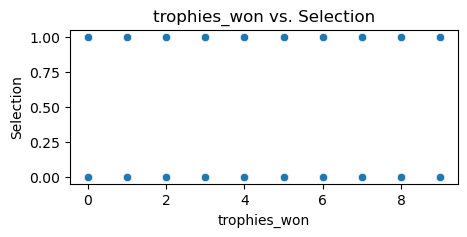

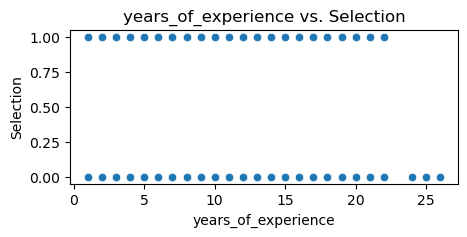

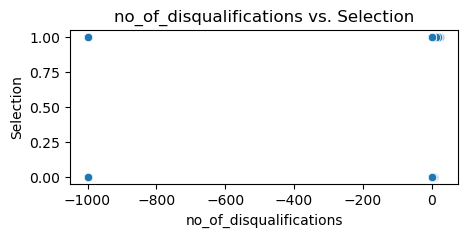

In [66]:
#visualisation
col=['age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications']
for i in col:
    if data[i].dtype != 'object':
        plt.figure(figsize=(5, 2))
        sns.scatterplot(x=i, y="selection", data=data)
        plt.title(f"{i} vs. Selection")
        plt.xlabel(i)
        plt.ylabel("Selection")
        plt.show()

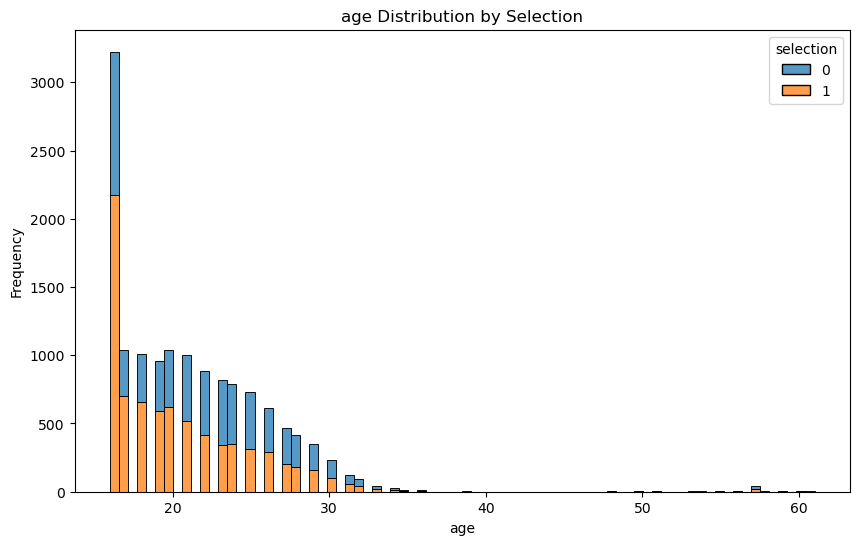

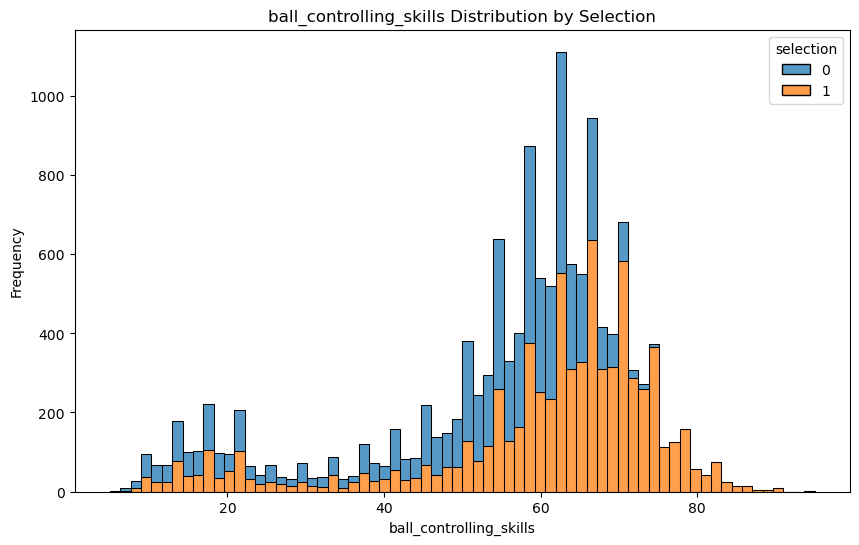

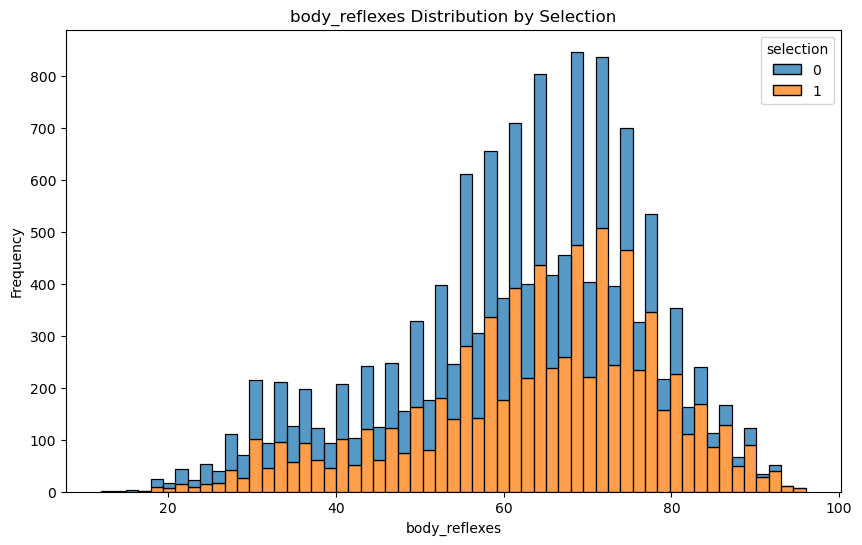

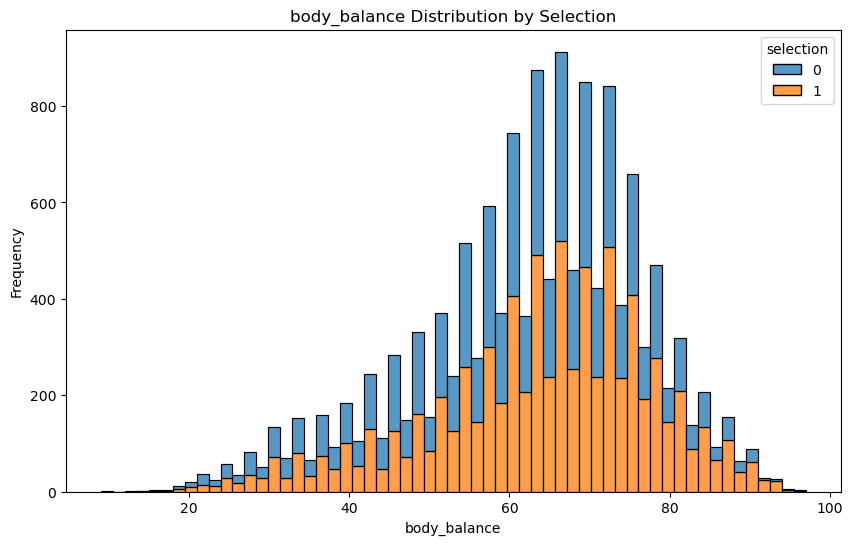

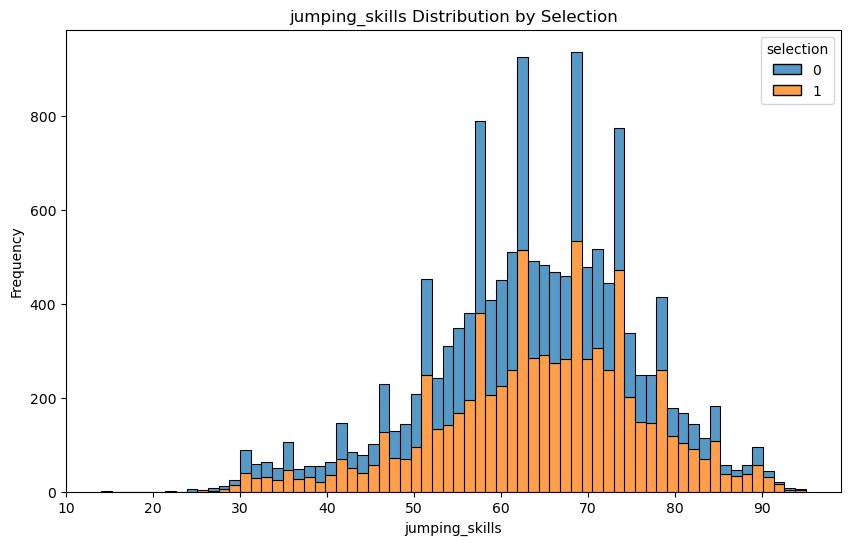

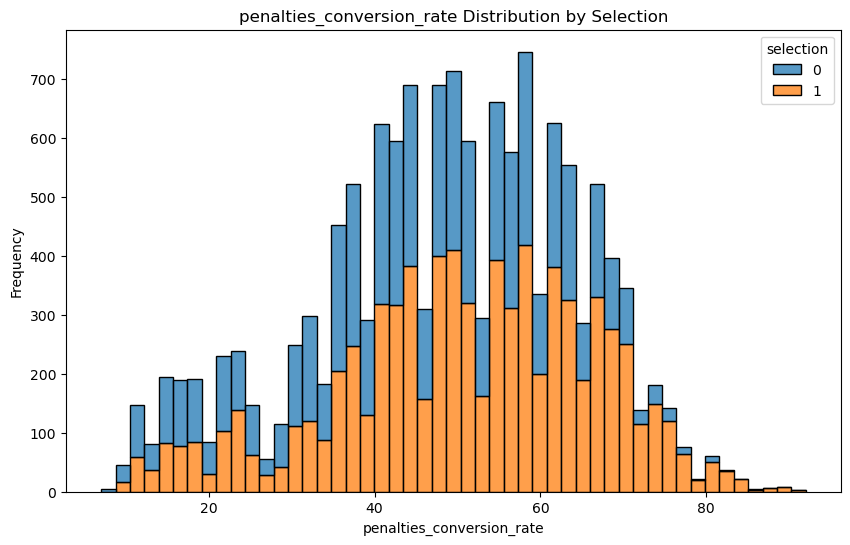

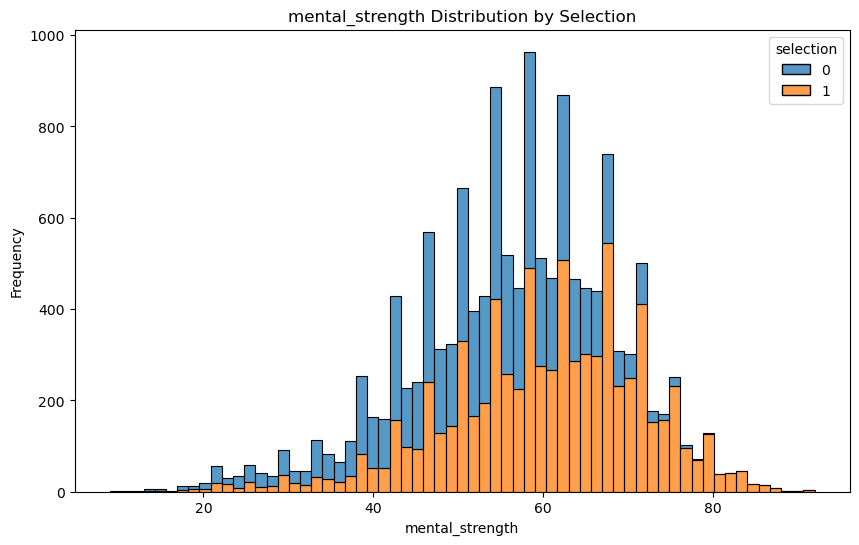

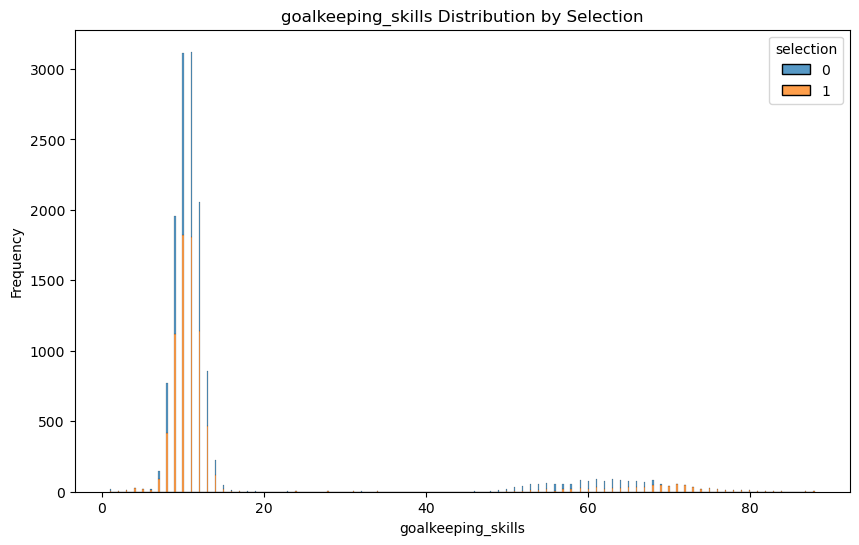

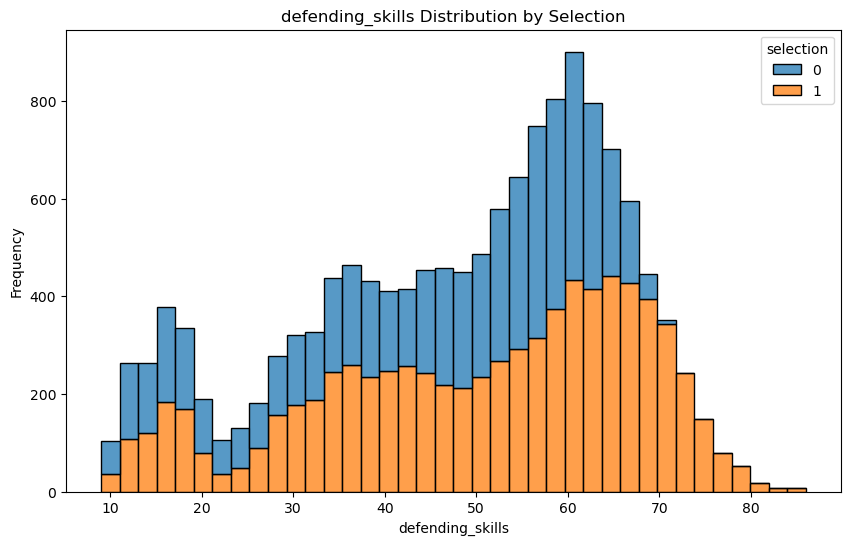

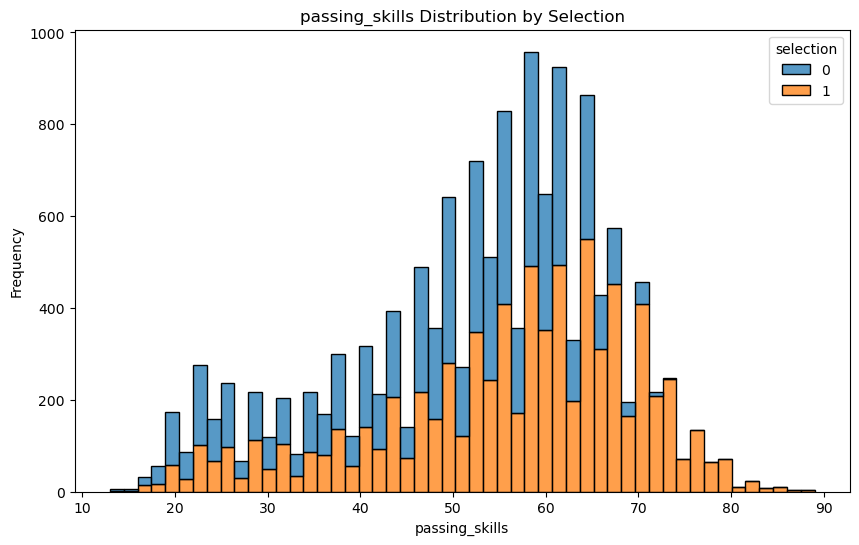

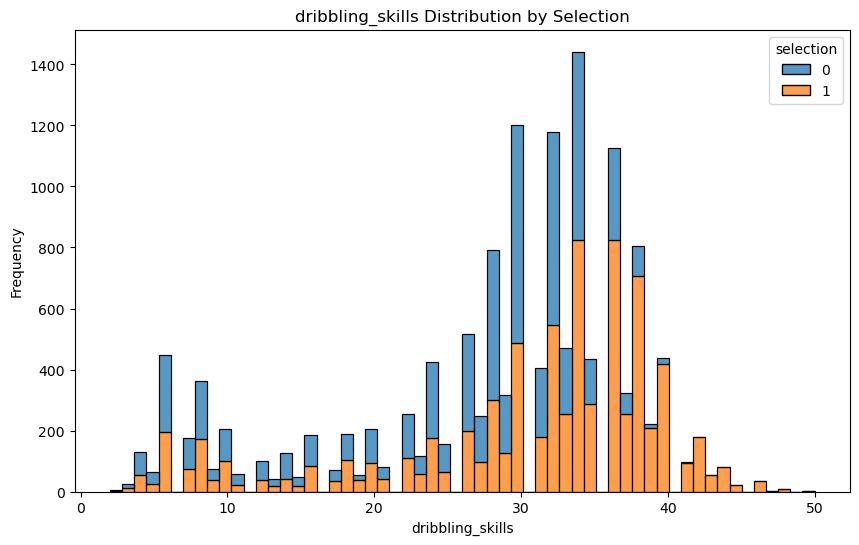

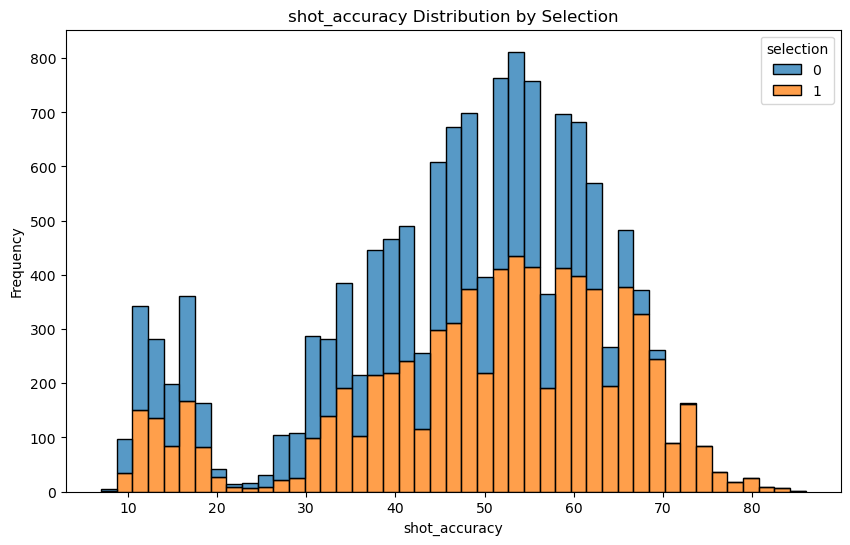

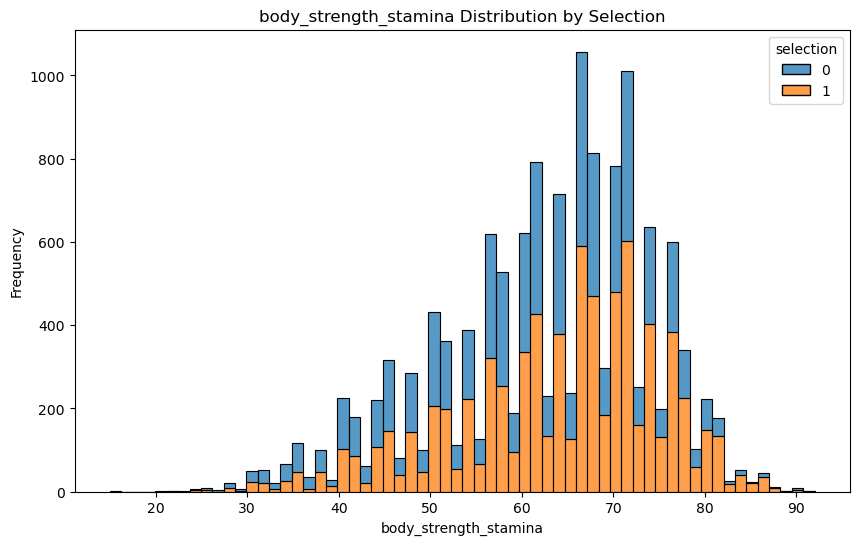

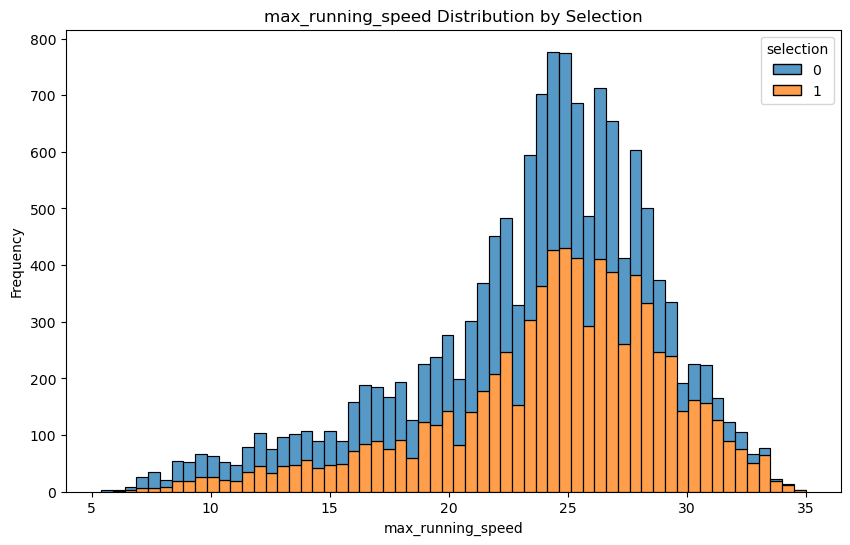

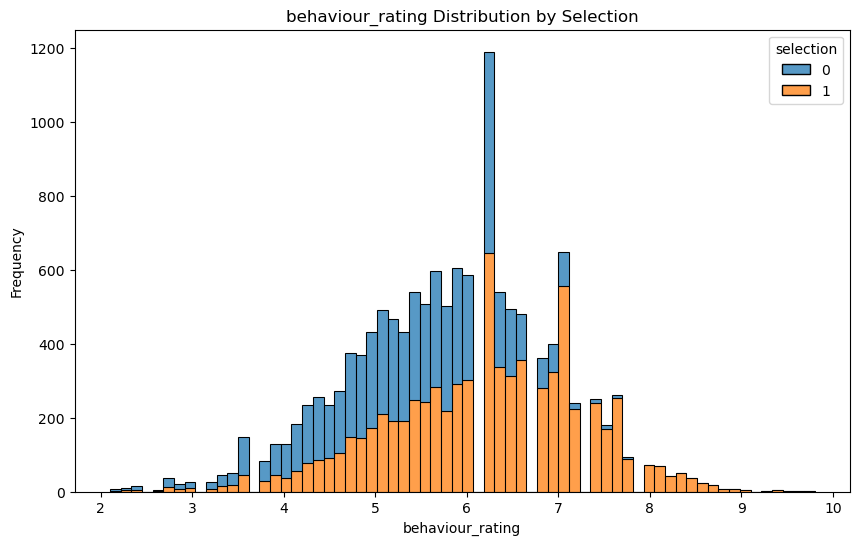

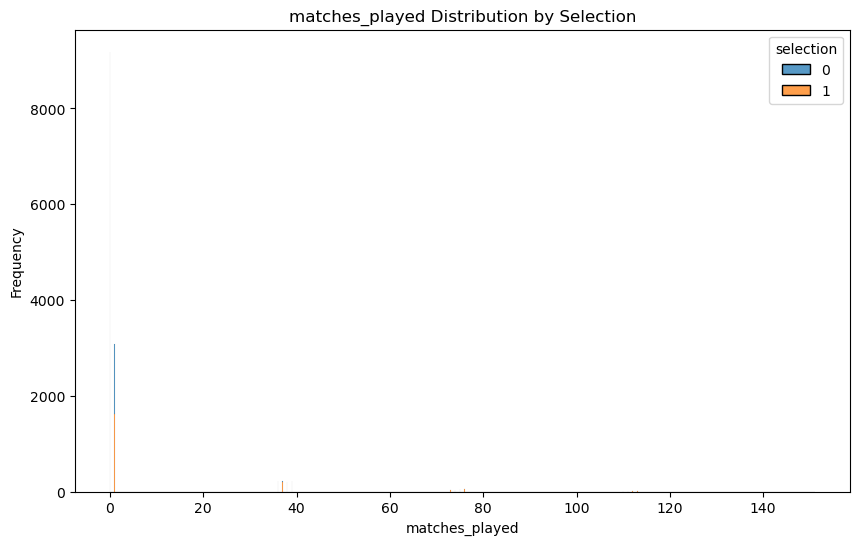

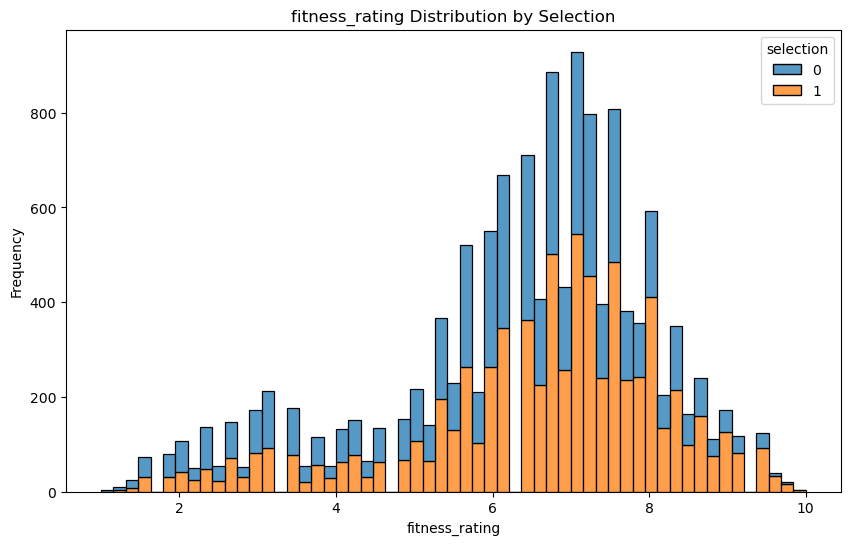

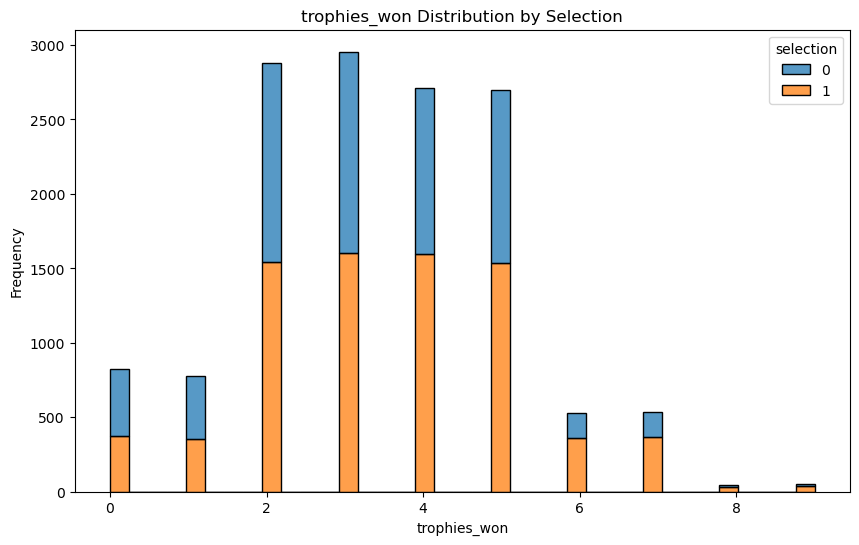

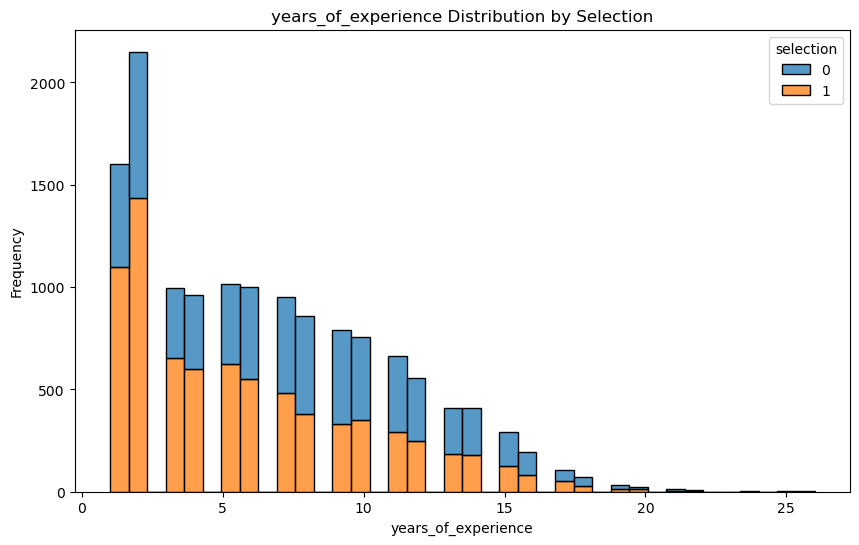

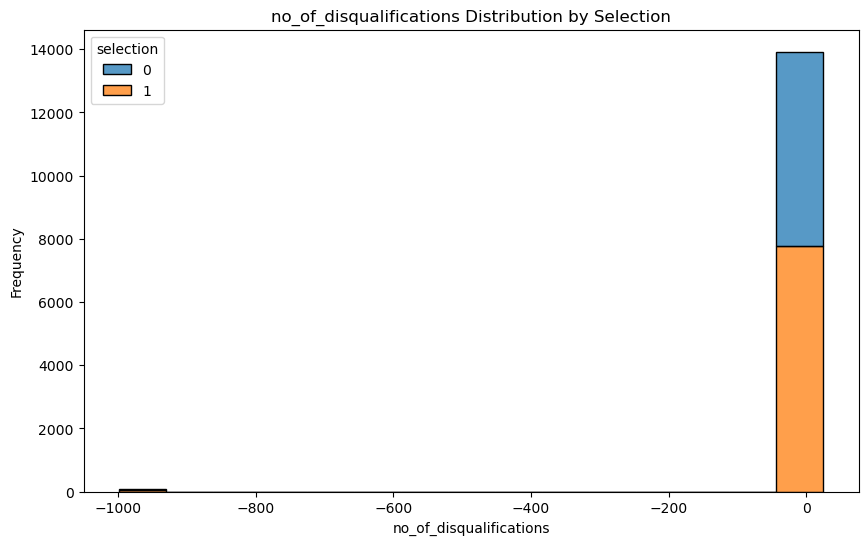

In [67]:
for i in col:
    if data[i].dtype != 'object':
        plt.figure(figsize=(10, 6))
        sns.histplot(data=data, x=i, hue="selection", multiple="stack")
        plt.title(f"{i} Distribution by Selection")
        plt.xlabel(i)
        plt.ylabel("Frequency")
        plt.show()

In [92]:
# converting weight and height to kg,cm
# Function to convert height from feet and inches to centimeters
def convert_height(height_str):
    if isinstance(height_str, str):
        feet, inches = height_str.split("'")
        total_inches = int(feet) * 12 + int(inches.strip("''"))
        return total_inches * 2.54
    return height_str

# Function to convert weight from lbs to kg
def convert_weight(weight_str):
    if isinstance(weight_str, str):
        weight_str = ''.join(filter(str.isdigit, weight_str))  # Remove non-numeric characters
        weight_lbs = float(weight_str)  # Convert the remaining digits to float
        return weight_lbs * 0.45359237
    return weight_str


# Apply the conversion functions to the DataFrame
data['height'] = data['height'].apply(convert_height)
data['weight'] = data['weight'].apply(convert_weight)

In [69]:
data.dtypes

player_id                     object
name                          object
age                            int64
gender                        object
country                       object
height                       float64
weight                       float64
ball_controlling_skills      float64
body_reflexes                float64
body_balance                 float64
jumping_skills               float64
penalties_conversion_rate    float64
mental_strength              float64
goalkeeping_skills           float64
defending_skills             float64
passing_skills               float64
dribbling_skills             float64
shot_accuracy                float64
body_strength_stamina        float64
max_running_speed            float64
strong_foot                   object
behaviour_rating             float64
matches_played               float64
fitness_rating               float64
trophies_won                 float64
dedication_level              object
coaching                      object
y

C:\Users\user\AppData\Local\Temp\ipykernel_10944\62490181.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = selected_df.corr()


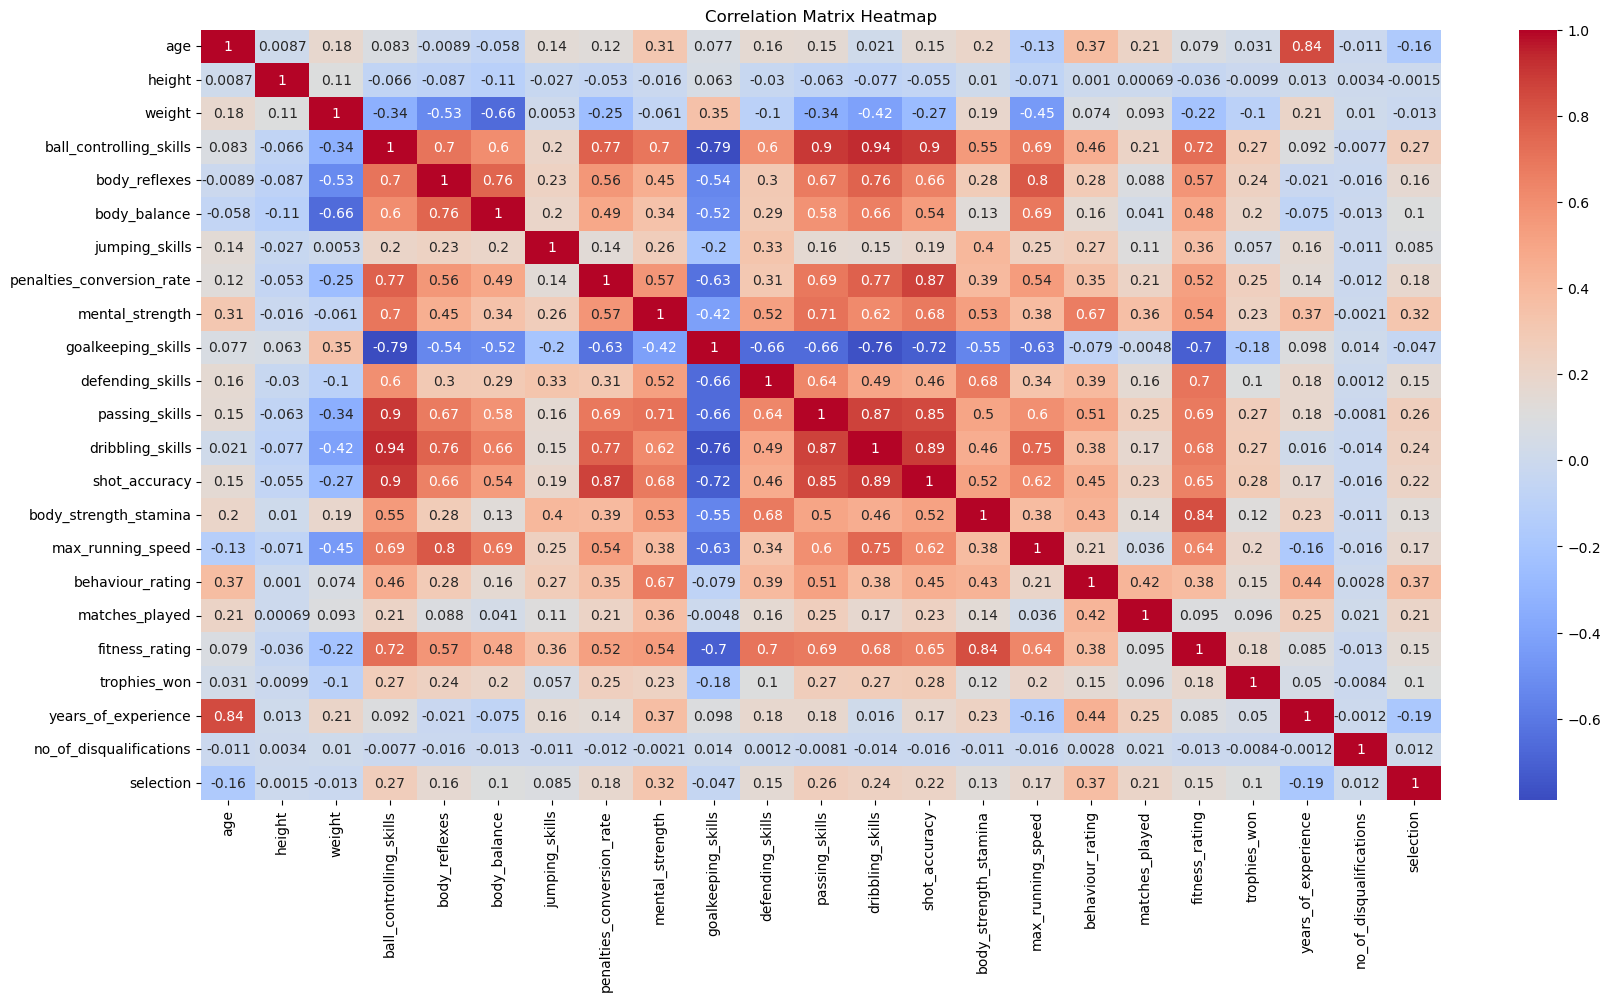

In [70]:
#correlation matrix
selected_cols = ['age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection']

# Select only the relevant columns from the DataFrame
selected_df = data[selected_cols]

# Calculate the correlation matrix
corr_matrix = selected_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

# Add a title
plt.title("Correlation Matrix Heatmap")

# Display the heatmap
plt.show()

In [ ]:
# a positive correlation exist for [
      # 'ball_controlling_skills', 'body_reflexes', 'body_balance','jumping_skills', 'penalties_conversion_rate', 'mental_strength',
        #, 'defending_skills', 'passing_skills','dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       # 'max_running_speed', 'behaviour_rating',
       # 'matches_played', 'fitness_rating', 'trophies_won', 'no_of_disqualifications',]

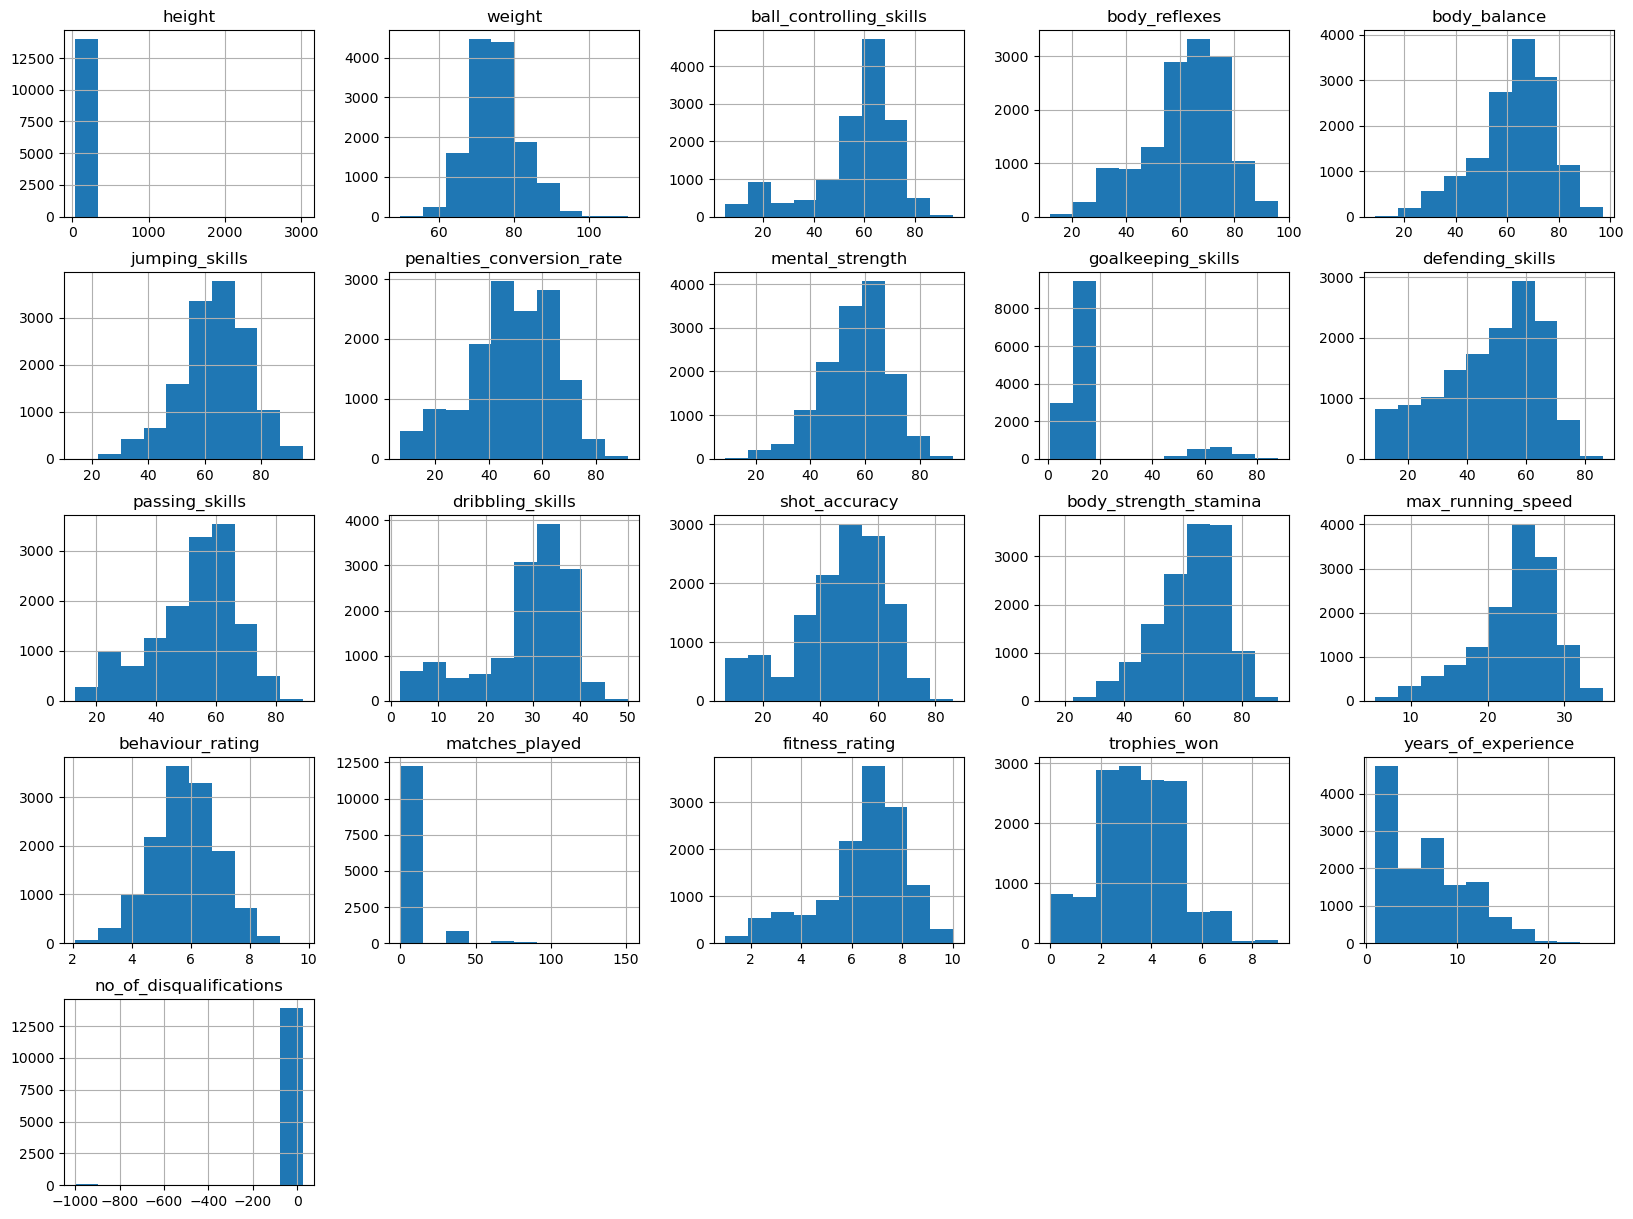

In [71]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [93]:
# as the data is almost uniformlly distributed we can replace missing values with mean
# List of columns with missing values
columns_with_missing = ['ball_controlling_skills', 'jumping_skills', 'penalties_conversion_rate','mental_strength','shot_accuracy','behaviour_rating',
'matches_played','fitness_rating','years_of_experience']

# Replace missing values with mean using a for loop
for col in columns_with_missing:
    mean_value = data[col].mean()
    data[col].fillna(mean_value, inplace=True)

In [52]:
#categorical colmn with mode

  

In [94]:
categorical_columns_with_missing = ['gender', 'strong_foot', 'coaching']
for col in categorical_columns_with_missing:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace=True)

In [51]:
data['gender'].value_counts()

M    6992
F    6983
Name: gender, dtype: int64

In [54]:
data['strong_foot'].value_counts()

Right    8359
Left     2531
None     1281
Any      1271
Name: strong_foot, dtype: int64

In [55]:
data['coaching'].value_counts()

Academy        9390
Talent Hunt    1993
Unknown        1360
Source         1126
Name: coaching, dtype: int64

In [95]:
#finding missing
data.isna().sum()

player_id                      0
name                           0
age                            0
gender                         0
country                        0
height                         0
weight                       417
ball_controlling_skills        0
body_reflexes                  0
body_balance                   0
jumping_skills                 0
penalties_conversion_rate      0
mental_strength                0
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                  0
body_strength_stamina          0
max_running_speed              0
strong_foot                    0
behaviour_rating               0
matches_played                 0
fitness_rating                 0
trophies_won                   0
dedication_level               0
coaching                       0
years_of_experience            0
no_of_disqualifications        0
selection                      0
dtype: int

In [38]:
#ball_controlling_skills 413,jumping_skills   24,penalties_conversion_rate     30mental_strength               28,shot_accuracy                572

In [75]:
data.dtypes

player_id                     object
name                          object
age                            int64
gender                        object
country                       object
height                       float64
weight                       float64
ball_controlling_skills      float64
body_reflexes                float64
body_balance                 float64
jumping_skills               float64
penalties_conversion_rate    float64
mental_strength              float64
goalkeeping_skills           float64
defending_skills             float64
passing_skills               float64
dribbling_skills             float64
shot_accuracy                float64
body_strength_stamina        float64
max_running_speed            float64
strong_foot                   object
behaviour_rating             float64
matches_played               float64
fitness_rating               float64
trophies_won                 float64
dedication_level              object
coaching                      object
y

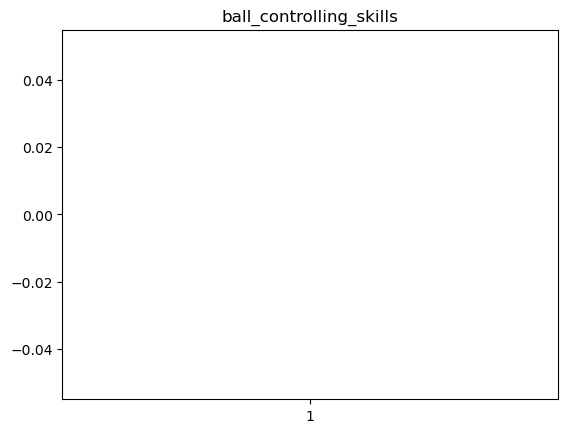

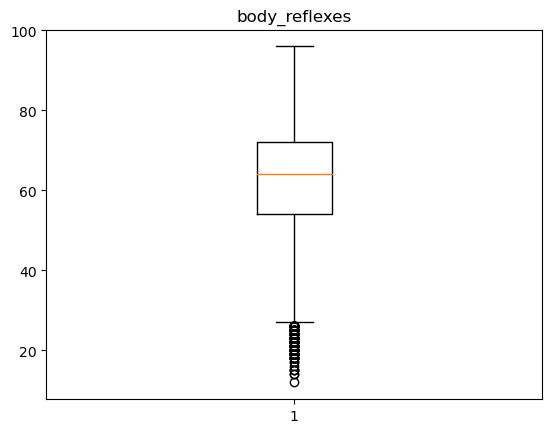

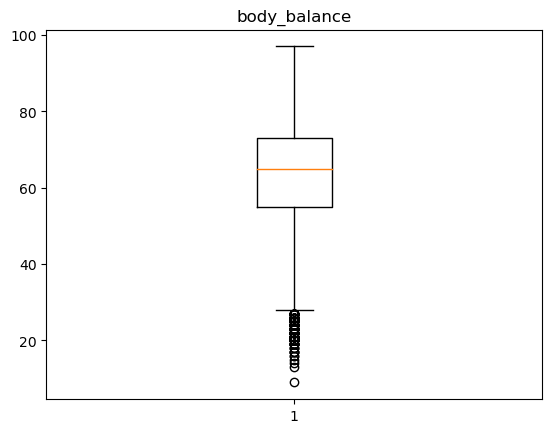

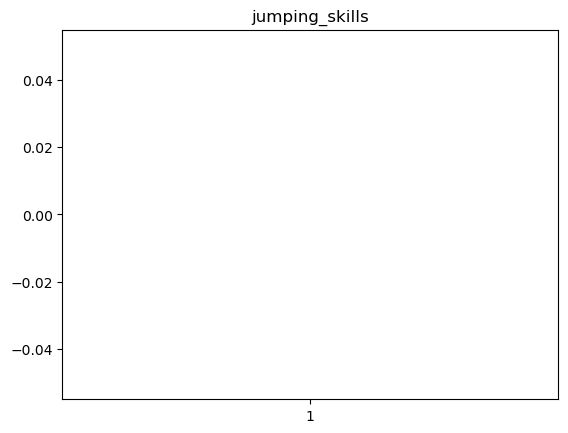

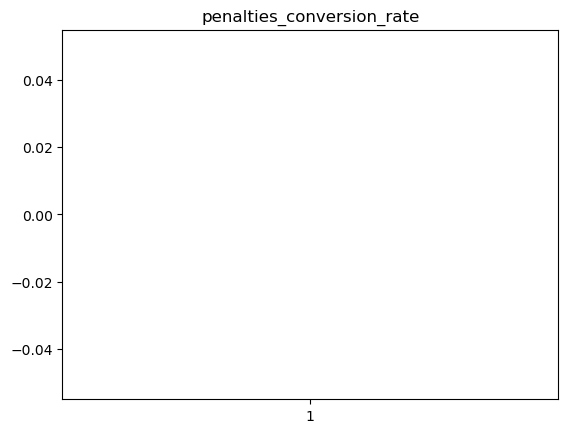

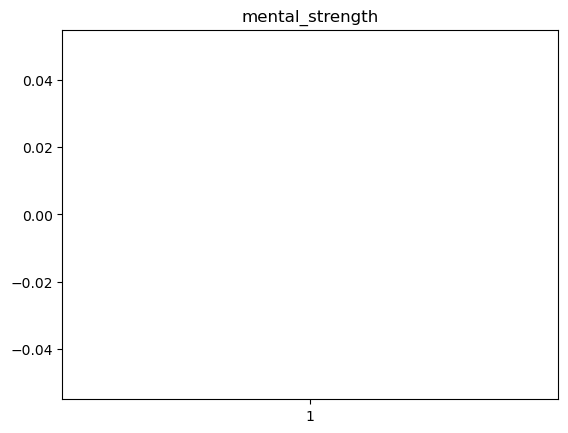

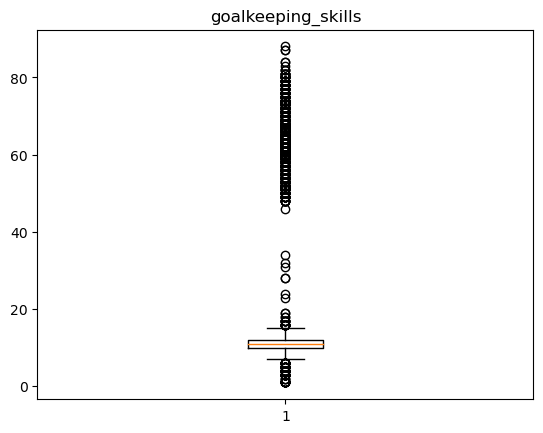

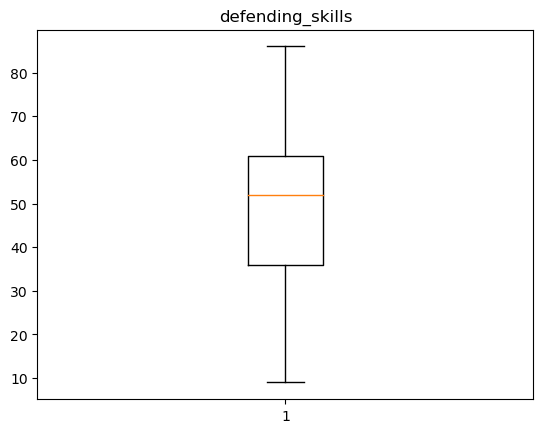

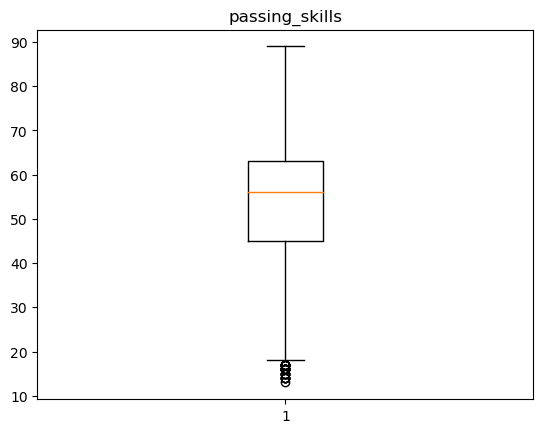

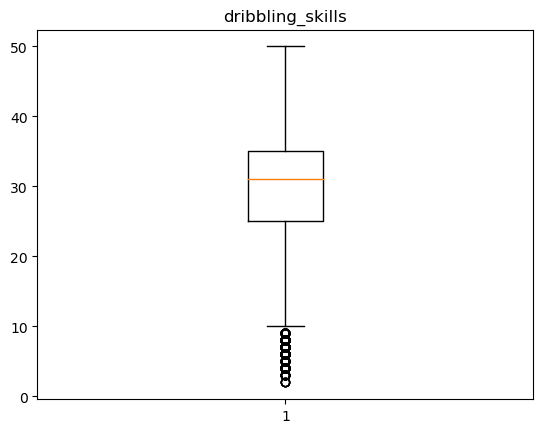

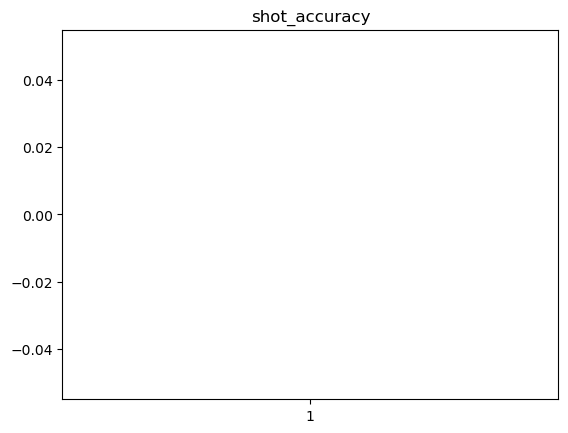

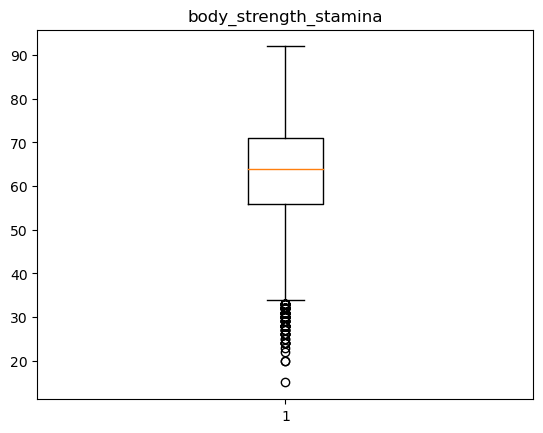

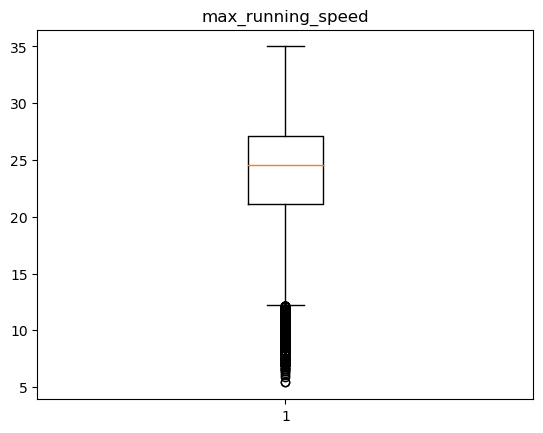

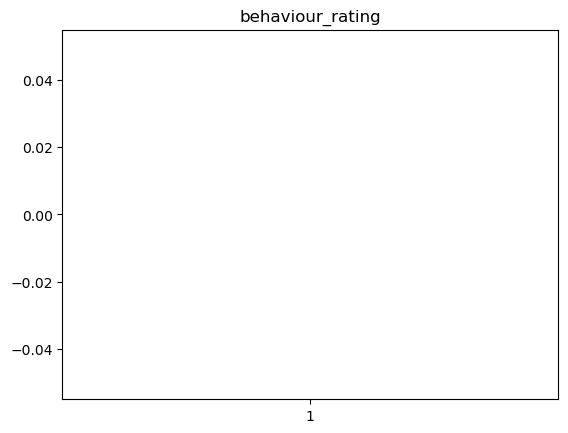

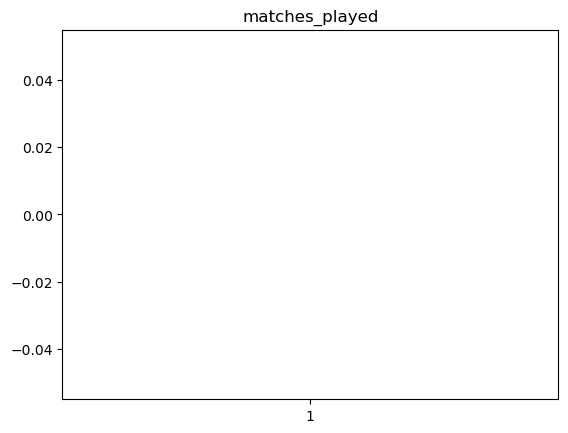

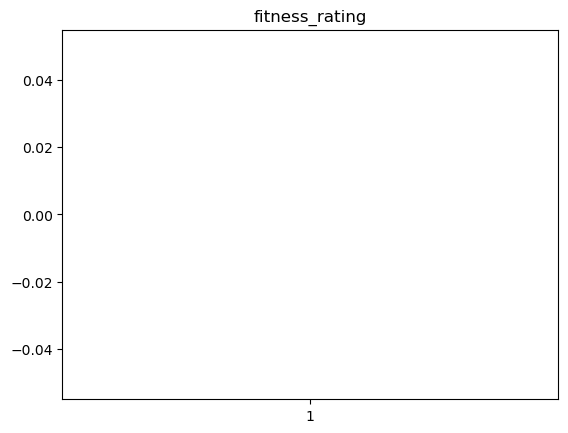

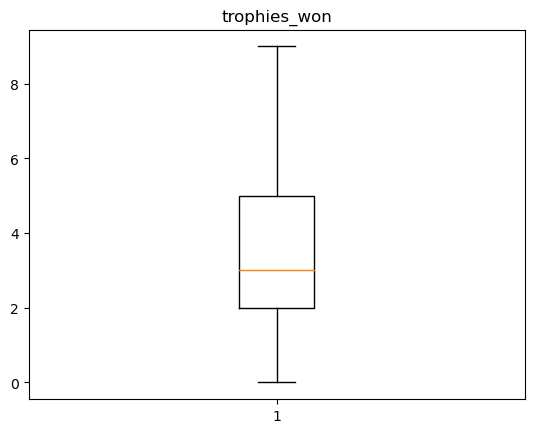

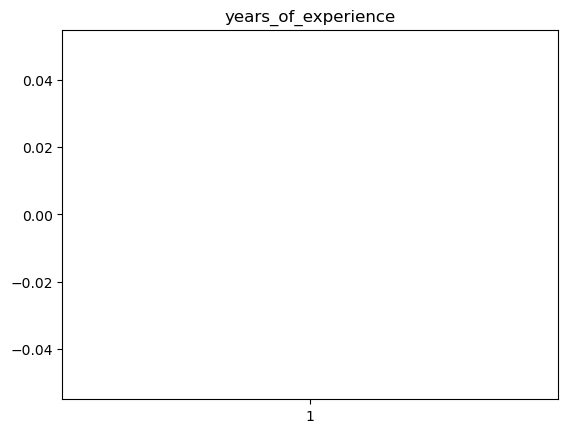

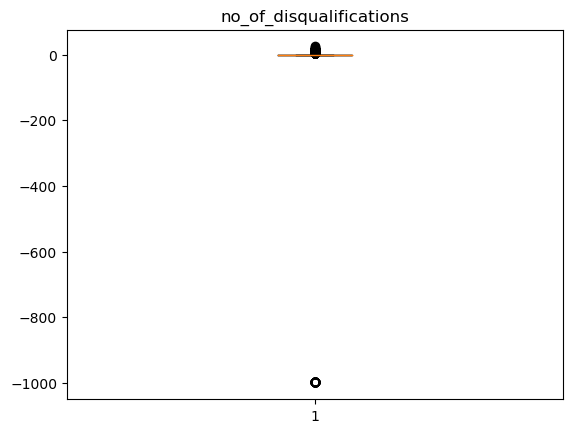

In [44]:
#finding outliers
num_cols=['ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won'
       , 'years_of_experience', 'no_of_disqualifications']
for i in num_cols:
    plt.figure()
    plt.boxplot (data[i])
    plt.title(i)

In [97]:
#one hot encoding categorical columns
# List of categorical columns to one-hot encode
categorical_columns = ['gender', 'strong_foot','country', 'coaching','dedication_level']

# Perform one-hot encoding using pandas' get_dummies function
encoded_data = pd.get_dummies(data, columns=categorical_columns)



In [96]:
#applying minmax scaling
# List of columns to scale
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = [ 'age', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won' ,
      'years_of_experience', 'no_of_disqualifications',
       ]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max Scaling to selected columns
encoded_data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

ValueError: could not convert string to float: 'Right'

In [81]:
encoded_data.head()

,player_id,name,age,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,...,country_Wales,country_Zambia,country_Zimbabwe,coaching_Academy,coaching_Source,coaching_Talent Hunt,coaching_Unknown,dedication_level_High,dedication_level_Low,dedication_level_Medium
0,PLID_4964,Keva Horan,23,187.96,79.832257,77.0,58.0,47.0,59.0,41.0,...,0,0,0,0,0,1,0,1,0,0
1,PLID_11234,Herma Tann,18,177.80,67.131671,54.0,69.0,70.0,62.0,53.0,...,0,0,0,0,1,0,0,0,0,1
2,PLID_19127,Eilene Kizer,16,187.96,78.017888,34.0,43.0,45.0,69.0,49.0,...,0,0,0,1,0,0,0,0,1,0
3,PLID_17467,Andrea Badgett,27,180.34,74.842741,79.0,73.0,76.0,86.0,81.0,...,0,0,0,1,0,0,0,0,0,1
4,PLID_9661,Jeremiah Bumbalough,19,172.72,71.667594,47.0,61.0,74.0,57.0,49.0,...,0,0,0,1,0,0,0,0,0,1


In [84]:
encoded_data.columns

Index(['player_id', 'name', 'age', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate',
       ...
       'country_Wales', 'country_Zambia', 'country_Zimbabwe',
       'coaching_Academy', 'coaching_Source', 'coaching_Talent Hunt',
       'coaching_Unknown', 'dedication_level_High', 'dedication_level_Low',
       'dedication_level_Medium'],
      dtype='object', length=201)

In [101]:
columns_to_drop=['player_id', 'name', 'age','height', 'weight','goalkeeping_skills','years_of_experience','selection']
X = encoded_data.drop(columns=columns_to_drop)
y = data['selection']

In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [103]:
#SVM support vector classifier model
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')#type of kernal used is linear,polynomial,rbf
svmclf.fit(X_train,y_train)

SVC(kernel='linear')

In [104]:
y_pred=svmclf.predict(X_test)

In [105]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [106]:
print('Accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print('f1:',f1_score(y_test,y_pred))

Accuracy: 0.6901971991997714
precision: 0.6925287356321839
recall: 0.7658898305084746
f1: 0.7273641851106639


In [107]:
print('confusion_matrix:',confusion_matrix(y_test,y_pred))

confusion_matrix: [[ 969  642]
 [ 442 1446]]


In [ ]:
# applying Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

In [ ]:
y_predi=rf_clf.predict(X_test)

In [ ]:
print('Accuracy:',accuracy_score(y_test,y_predi))
print('confusion_matrix:',confusion_matrix(y_test,y_predi))

In [ ]:
#applying grid search in SVM-Hyperparameter tuning

In [ ]:
# Define the SVM model
svm_model = SVC()

# Define the hyperparameters and their potential values
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model with the best hyperparameters
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Accuracy on test set:", accuracy)





